<a href="https://colab.research.google.com/github/riyadodthi/CIFAR10_Image_Classification/blob/main/2_MSc_Project_TempVsQuality(38%25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

In [27]:
# Load Data -  Weather and air quality for each day
weather_df = pd.read_csv("/content/drive/MyDrive/Exam/london_weather.csv")
quality_df = pd.read_csv("/content/drive/MyDrive/Exam/air-quality-london-time-of-day.csv")

#display(weather_df)
#quality_df.head(2)


In [28]:
# Data Cleaning
# Quality
df_qdate = quality_df.drop(columns='GMT') # drop time
df_qdate.fillna(0,inplace=True)  # fill NA
df_qdate['Month']=pd.to_datetime(df_qdate['Month'],yearfirst=True) # convert month col to date format

# Weather
df_w = weather_df
df_w.fillna(0,inplace=True)
#df_qdate

In [29]:
# Mean quality for each month
df_qdate_gr = df_qdate.set_index('Month')
df_qdate_gr = df_qdate_gr.groupby(pd.Grouper(freq='D'))
df_qdate_mean = df_qdate_gr.mean()

df_qdate_mean.dropna(inplace=True)
#df_qdate_mean

In [30]:
# Fix date format issue (from yyyy-dd-mm to yyyy-mm-dd)
date_month = pd.date_range(start='2008-01-01', end='2019-07-01', freq='MS') # genrate new date col for each month
df_qdate_mean['date'] = date_month
df_qdate_mean.set_index('date',inplace=True)
#df_qdate_mean

In [31]:
# Fix date format issue
date_range = pd.date_range(start='1979-01-01', end='2020-12-31', freq='D')
weather_df['date2'] = date_range

weather_df_new = weather_df.drop(columns='date')

# mean of weather
weather_df_new.set_index('date2',inplace=True)
df_wdate_gr = weather_df_new.groupby(pd.Grouper(freq='M'))
df_wdate_mean = df_wdate_gr.mean()

date_range_month = pd.date_range(start='1979-01-01', end='2020-12-01', freq='MS')
print(date_range_month.size)
df_wdate_mean['date'] = date_range_month
df_wdate_mean.set_index('date',inplace=True)


#display(df_wdate_mean)



504


In [32]:
# merge both ds based on date
df_merge = pd.merge(df_qdate_mean, df_wdate_mean, left_index=True, right_index=True)
df_merge.reset_index(inplace=True)

# Add columns for total roadside pollution and background pollution

df_merge['Total Roadside'] = df_merge.iloc[:,1:8].sum(axis=1)
df_merge['Total Background'] = df_merge.iloc[:,8:14].sum(axis=1)
df_merge

,date,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),...,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Total Roadside,Total Background
0,2008-01-01,0.000000,55.512500,0.000000,29.512500,24.970833,14.675000,4.216667,0.000000,42.345833,...,1.941935,30.419355,10.412903,7.390323,4.709677,2.225806,101234.516129,0.000000,128.887500,101.679167
1,2008-02-01,0.000000,75.925000,0.000000,20.316667,39.487500,28.775000,7.554167,0.000000,60.241667,...,4.482759,67.137931,10.989655,6.500000,2.031034,0.531034,102306.551724,0.000000,172.058333,125.275000
2,2008-03-01,0.000000,55.600000,0.000000,40.112500,21.570833,12.308333,3.870833,0.000000,39.800000,...,2.764516,91.225806,10.587097,6.845161,3.719355,2.251613,100653.870968,0.000000,133.462500,107.783333
3,2008-04-01,0.000000,61.758333,0.000000,37.879167,28.750000,20.454167,4.475000,0.000000,44.004167,...,4.676667,151.800000,13.660000,9.056667,5.190000,2.113333,101034.333333,0.133333,153.316667,119.104167
4,2008-05-01,0.000000,62.912500,0.000000,46.270833,34.620833,27.500000,4.629167,0.000000,44.133333,...,5.245161,182.225806,19.751613,14.641935,10.454839,2.070968,101490.322581,0.000000,175.933333,138.445833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2019-03-01,30.945833,42.579167,90.037500,34.883333,20.908333,11.300000,4.908333,7.712500,25.704167,...,3.838710,103.806452,13.229032,9.483871,5.845161,1.600000,101650.645161,0.000000,235.562500,141.041667
135,2019-04-01,25.225000,46.233333,84.916667,38.125000,32.254167,22.804167,12.416667,6.937500,31.445833,...,5.670000,163.800000,15.923333,10.736667,5.700000,0.426667,101407.666667,0.000000,261.975000,164.983333
136,2019-05-01,24.691667,39.666667,77.504167,35.683333,19.487500,10.650000,11.504167,5.483333,22.445833,...,5.687097,194.161290,18.838710,13.448387,8.361290,1.161290,101714.838710,0.000000,219.187500,127.766667
137,2019-06-01,22.004167,34.862500,68.600000,31.383333,17.958333,9.191667,4.487500,4.975000,19.420833,...,5.670000,166.266667,21.670000,16.893333,11.923333,2.726667,101446.333333,0.000000,188.487500,117.025000


In [33]:
df_roadside = df_merge.iloc[:,14:24]
df_bckgrnd = df_merge.iloc[:,14:23]
df_bckgrnd['Total Background'] = df_merge.iloc[:,24]
df_roadside['Total roadside'] = df_merge.iloc[:,23]
#df_bckgrnd

Find the highest corr value after 1:
 cloud_cover       sunshine           -0.723888
sunshine          cloud_cover        -0.723888
cloud_cover       global_radiation   -0.535424
global_radiation  cloud_cover        -0.535424
min_temp          Total Background   -0.518164
                                        ...   
global_radiation  sunshine            0.929564
sunshine          global_radiation    0.929564
max_temp          min_temp            0.969485
min_temp          max_temp            0.969485
mean_temp         min_temp            0.990601
Length: 87, dtype: float64


<Axes: >

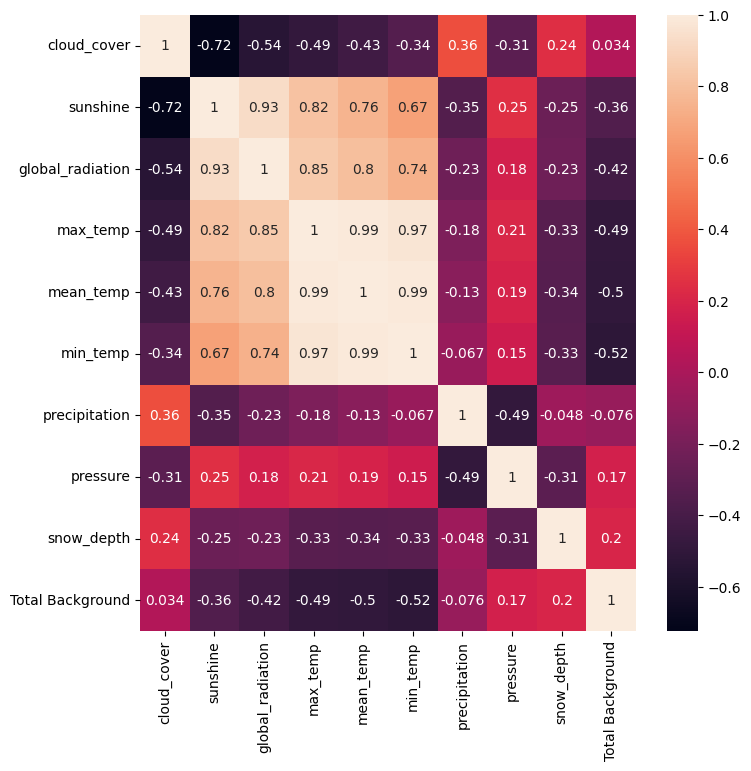

In [34]:
#Correlation between features

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

#feature_df = pd.DataFrame(np.column_stack((X,y)))
feature_df = pd.merge(df_bckgrnd.iloc[:,0:9], df_bckgrnd.iloc[:,9], left_index=True, right_index=True)
#display(feature_df)

corr = feature_df.corr()
#display(corr)

sorted_mat = corr.unstack().sort_values() # Sort corr values
print("Find the highest corr value after 1:\n",sorted_mat[:-13])
sns.heatmap(corr, annot=True,ax=ax)

In [35]:
'''
# drop unneccessary cols for bckgrnd ds
drop_col = ['cloud_cover','sunshine','max_temp','mean_temp','precipitation', 'pressure','snow_depth']
#drop_col = ['precipitation', 'cloud_cover']
df_bckgrnd = df_bckgrnd.drop(columns=drop_col)
'''

"\n# drop unneccessary cols for bckgrnd ds\ndrop_col = ['cloud_cover','sunshine','max_temp','mean_temp','precipitation', 'pressure','snow_depth']\n#drop_col = ['precipitation', 'cloud_cover']\ndf_bckgrnd = df_bckgrnd.drop(columns=drop_col)\n"

In [36]:
df_bckgrnd= df_bckgrnd.round(1)
sc = StandardScaler()
df_bckgrnd_norm = pd.DataFrame(sc.fit_transform(df_bckgrnd))

In [37]:
# Split into training and testing
bckx_train, bckx_test, bcky_train, bcky_test = train_test_split(df_bckgrnd_norm.iloc[:,0:9],df_bckgrnd_norm.iloc[:,-1],test_size=0.5, random_state=10)
print(bckx_train.shape, bcky_train.shape, bckx_test.shape, bcky_test.shape)

(69, 9) (69,) (70, 9) (70,)


In [38]:
'''
bckx_train =pd.DataFrame(np.array(bckx_train).reshape(-1, ))
bckx_test =pd.DataFrame(np.array(bckx_test).reshape(-1, ))
bckx_train.shape
'''

'\nbckx_train =pd.DataFrame(np.array(bckx_train).reshape(-1, ))\nbckx_test =pd.DataFrame(np.array(bckx_test).reshape(-1, ))\nbckx_train.shape\n'

In [39]:
print(bcky_train.shape)

bckx_train


(69,)


,0,1,2,3,4,5,6,7,8
50,-1.830789,0.847697,0.206714,-0.197924,-0.405199,-0.698117,-1.236475,1.683284,-0.208357
82,-0.059726,-1.264688,-1.166343,-0.610596,-0.405199,-0.206331,2.738609,-0.992315,-0.208357
4,-0.170417,0.538567,0.986096,0.696198,0.556072,0.598409,0.437244,0.037330,-0.208357
5,-0.391800,1.311391,1.573923,0.868145,0.752250,0.911364,-0.190401,0.242851,-0.208357
44,-0.945257,0.641610,0.221337,1.005702,1.007280,1.023133,-0.504223,-0.115856,-0.208357
...,...,...,...,...,...,...,...,...,...
113,-0.502491,1.362912,0.961238,1.401179,1.419253,1.358442,-0.190401,-0.163862,-0.208357
64,-0.170417,0.590089,0.990483,0.111580,0.065628,-0.027500,-0.399616,-0.296165,-0.208357
15,-0.613183,0.847697,0.730202,0.059996,-0.110932,-0.139270,-0.818046,-0.174431,-0.208357
125,-0.834566,1.878128,0.725815,1.504347,1.360400,1.179611,-1.759513,0.626899,-0.208357


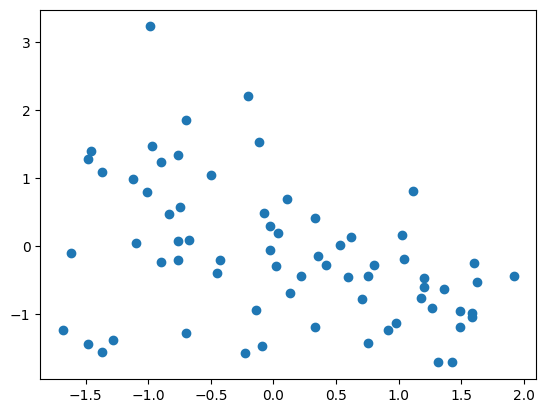

In [40]:
import matplotlib.pyplot as plt

plt.scatter(bckx_train.iloc[:,5],bcky_train)
#plt.scatter(bckx_train.iloc[:,0],bcky_train)
#plt.scatter(bckx_train.iloc[:,2],bcky_train)

plt.show()

In [41]:
'''
# Regression model on training data to find outliers
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
poly = PolynomialFeatures(degree=5)
lss = Lasso()

param_lss = {'alpha': [0.01, 0.1, 1, 10]}
param_rfr = {'n_estimators': [100,120], 'random_state':[12]}
param_lr = {'fit_intercept':[True]}
param_dt = {'random_state':[0,4]}
param_svr = {
    'kernel' :['linear', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale'],
    'epsilon': [0.1, 0.2, 0.3]
}
#grid_search = GridSearchCV(estimator=lss, param_grid=param_lss, cv=5)

model = make_pipeline( StandardScaler(), GridSearchCV(lss,param_grid=param_lss, cv=6))
#best_alpha = grid_search.best_params_['alpha']
#print("Best Alpha:", best_alpha)
model.fit(bckx_train, bcky_train)
y_pred = model.predict(bckx_train)
print("Score: ",model.score(bckx_test,bcky_test))
'''

'\n# Regression model on training data to find outliers\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.svm import SVR\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error\nfrom sklearn.linear_model import Lasso\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler, PolynomialFeatures\n\nlr = LinearRegression()\ndt = DecisionTreeRegressor()\nsvr = SVR()\nrfr = RandomForestRegressor()\npoly = PolynomialFeatures(degree=5)\nlss = Lasso()\n\nparam_lss = {\'alpha\': [0.01, 0.1, 1, 10]}\nparam_rfr = {\'n_estimators\': [100,120], \'random_state\':[12]}\nparam_lr = {\'fit_intercept\':[True]}\nparam_dt = {\'random_state\':[0,4]}\nparam_svr = {\n    \'kernel\' :[\'linear\', \'poly\', \'sigmoid\'],\n    \'C\': [0.

In [42]:

# Regression model on training data to find outliers
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
poly = PolynomialFeatures(degree=5)
lss = Lasso()
en = ElasticNet()

param_en = {'alpha': [0.2, 0.1, 0.3], 'l1_ratio': [0.2, 0.5, 0.8],'fit_intercept':[True,False]}

param_lss = {'alpha': [0.2, 0.1, 0.3, 0.4]}
param_rfr = {'n_estimators': [100,120], 'random_state':[12]}
param_lr = {'fit_intercept':[True]}
param_dt = {'random_state':[0,4]}
param_svr = {
    'kernel' :['linear', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale'],
    'epsilon': [0.1, 0.2, 0.3]
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('en', ElasticNet())
])
param_m = {
    'poly__degree': [1, 2, 3],       # Polynomial degree
    'en__alpha': [0.2, 0.1, 0.3]   # ElasticNet regularization strength
}

model = GridSearchCV(estimator=pipeline, param_grid=param_m, cv=6)
model.fit(bckx_train,bcky_train)
best_alpha = model.best_params_
print("Best Alpha:", best_alpha)
best_elastic_net = model.best_estimator_

# Make predictions
predictions = best_elastic_net.predict(bckx_test)

# Evaluate the model
mse = mean_squared_error(bcky_test, predictions)
print("Mean Squared Error:", mse)

#model = make_pipeline(StandardScaler(),GridSearchCV(en,param_grid=param_en, cv=6))

#model.fit(bckx_train, bcky_train)
y_pred = model.predict(bckx_train)
print("Score: ",model.score(bckx_test,bcky_test))


Best Alpha: {'en__alpha': 0.3, 'poly__degree': 1}
Mean Squared Error: 0.7180636716002976
Score:  0.22729220026021113


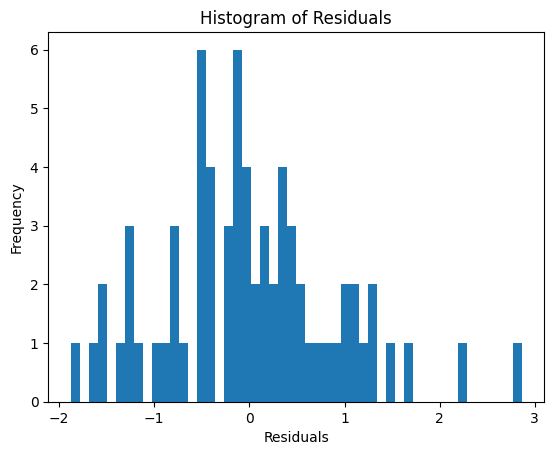

In [43]:
res = bcky_train - y_pred

import matplotlib.pyplot as plt


plt.hist(res, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [44]:
from scipy import stats
z_scores = stats.zscore(res)

threshold = 1.5

outlier_mask = np.abs(z_scores) > threshold


bck_train = pd.merge(bckx_train, bcky_train, left_index=True, right_index=True)
outlier_residuals = bcky_train[outlier_mask]
outlier_indices = bck_train.index[outlier_mask]
#outlier_indices = np.where(outlier_mask)[0]
print(outlier_residuals.shape)
#list(outlier_indices)


(9,)


In [45]:

bck_train = bck_train.drop(list(outlier_indices))
bck_train
#bx, by = bck_train.iloc[:,0:2], bck_train.iloc[:,2]
bx, by = bck_train.iloc[:,0:9], bck_train.iloc[:,-1]

In [46]:
bx.shape, by.shape

((60, 9), (60,))

In [47]:
bckx_test.shape,bcky_test.shape

((70, 9), (70,))

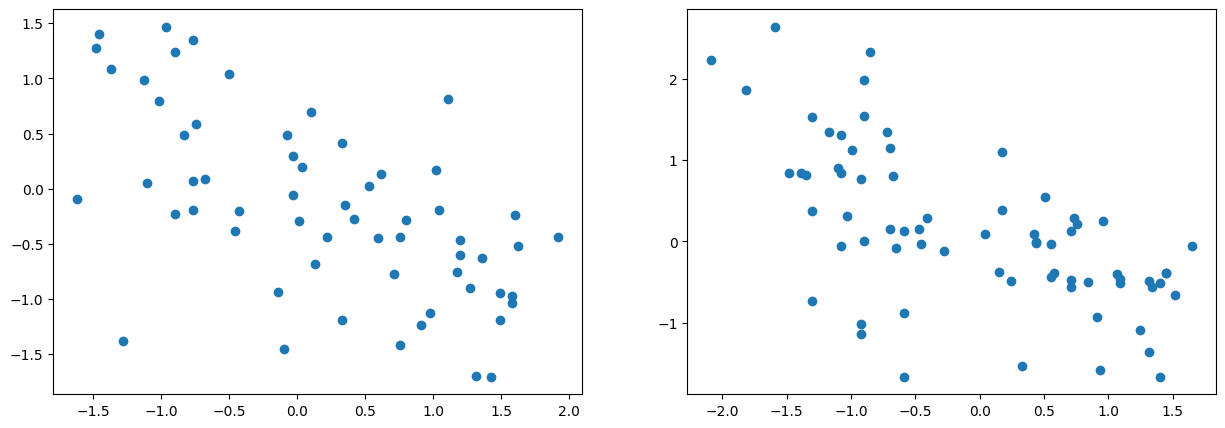

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(bx.iloc[:,5],by)
ax[1].scatter(bckx_test.iloc[:,5],bcky_test)


plt.show()

In [49]:

model.fit(bx, by)
y_pred = model.predict(bckx_test)
print("Test Score: ",model.score(bckx_test,bcky_test))
print("Train Score: ",model.score(bx,by))



Test Score:  0.38160706521007826
Train Score:  0.5625675745521861


In [50]:
'''
import requests
import json

# Replace with the actual API endpoint and properly formatted dates
api_url = 'https://api.erg.ic.ac.uk/AirQuality/Annual/MonitoringObjective/GroupName=London/Year=2008/Json'

# Construct the request without any special authentication headers
response = requests.get(api_url)

if response.status_code == 200:
    # Parse the JSON data from the response
    json_data = response.json()

    # Specify the file path to store the JSON data
    file_path = "data.json"  # Replace with your desired file path

    # Write the JSON data to the file
    with open(file_path, "w") as json_file:
        json.dump(json_data, json_file, indent=2)

    print("JSON data has been successfully stored in the file:", file_path)
else:
    print(f"Error: {response.status_code} - {response.text}")
'''

'\nimport requests\nimport json\n\n# Replace with the actual API endpoint and properly formatted dates\napi_url = \'https://api.erg.ic.ac.uk/AirQuality/Annual/MonitoringObjective/GroupName=London/Year=2008/Json\'\n\n# Construct the request without any special authentication headers\nresponse = requests.get(api_url)\n\nif response.status_code == 200:\n    # Parse the JSON data from the response\n    json_data = response.json()\n\n    # Specify the file path to store the JSON data\n    file_path = "data.json"  # Replace with your desired file path\n\n    # Write the JSON data to the file\n    with open(file_path, "w") as json_file:\n        json.dump(json_data, json_file, indent=2)\n\n    print("JSON data has been successfully stored in the file:", file_path)\nelse:\n    print(f"Error: {response.status_code} - {response.text}")\n'